In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
import seaborn as sns
import tifffile
from PIL import Image
import statistics

In [2]:
exp_dir = r"E:\ExperimentData\Imaging\2025_06_09_CALORIMETRIC_EXP\Images"
config_file = r"F:\Work\Colorimetry\Analysis.xlsx"
out_path = r"F:\Work\Colorimetry\09_06_2025_Results"
data = pd.read_excel(config_file, sheet_name = "09_06_2025_Exp")

In [5]:
start_folder = 6
end_folder = 30
width = 3
folders = [str(number).zfill(width) for number in range(start_folder, end_folder + 1)]

In [6]:
data['Sample'] = data['Sample'].apply(lambda x: x.replace("_", ""))
data.head()

,Sample,Molar,Dye,Timing,Black level,x,y,w,h,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,006,No Sample,NaN,NaN,128,941,517,99,329,NaN,NaN,NaN,NaN
1,007,10,0.0,0.0,128,934,703,95,148,NaN,NaN,NaN,NaN
2,008,10,300.0,0.0,128,893,682,100,169,NaN,NaN,NaN,NaN
3,009,10,300.0,2.0,128,893,682,100,169,NaN,NaN,NaN,NaN
4,010,1,300.0,0.0,128,915,639,95,215,NaN,NaN,NaN,NaN


# Crop Images

In [7]:
data['coords'] = data[['x','y','w','h']].apply(list, axis=1)

In [27]:
coords_dict = data.set_index('Sample')['coords'].to_dict()

{'006': [941, 517, 99, 329],
 '007': [934, 703, 95, 148],
 '008': [893, 682, 100, 169],
 '009': [893, 682, 100, 169],
 '010': [915, 639, 95, 215],
 '011': [915, 639, 95, 215],
 '012': [929, 675, 98, 171],
 '013': [945, 677, 78, 169],
 '014': [945, 677, 78, 169],
 '015': [909, 651, 93, 194],
 '016': [909, 651, 93, 194],
 '017': [807, 674, 90, 179],
 '018': [890, 674, 93, 179],
 '019': [890, 674, 93, 179],
 '020': [901, 629, 92, 217],
 '021': [901, 629, 92, 217],
 '022': [895, 670, 90, 181],
 '023': [895, 656, 87, 190],
 '024': [873, 635, 88, 208],
 '025': [880, 680, 90, 168],
 '026': [880, 680, 90, 168],
 '027': [868, 626, 98, 222],
 '028': [868, 626, 98, 222],
 '029': [903, 668, 91, 171],
 '030': [903, 668, 91, 171]}

In [37]:
for folder in os.listdir(exp_dir):
    folder_path = exp_dir + "/" + folder
    for file in os.listdir(folder_path):
        x, y, w, h = coords_dict[folder]
        im = Image.open(folder_path + "/" + file)
        img_array = np.array(im)
        rgb_image = img_array[y:y+h, x:x+w, :3]
        out_file_path = out_path + "/" + folder
        if not os.path.exists(out_file_path):
            os.mkdir(out_file_path)
        cv2.imwrite(out_file_path + "/" + file.split(".")[0] + ".jpg", cv2.cvtColor(rgb_image, cv2.COLOR_RGB2BGR))
    print(f"Folder {folder} is completed..")

Folder 006 is completed..
Folder 007 is completed..
Folder 008 is completed..
Folder 009 is completed..
Folder 010 is completed..
Folder 011 is completed..
Folder 012 is completed..
Folder 013 is completed..
Folder 014 is completed..
Folder 015 is completed..
Folder 016 is completed..
Folder 017 is completed..
Folder 018 is completed..
Folder 019 is completed..
Folder 020 is completed..
Folder 021 is completed..
Folder 022 is completed..
Folder 023 is completed..
Folder 024 is completed..
Folder 025 is completed..
Folder 026 is completed..
Folder 027 is completed..
Folder 028 is completed..
Folder 029 is completed..
Folder 030 is completed..


In [8]:
data.head()

,Sample,Molar,Dye,Timing,Black level,x,y,w,h,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,coords
0,006,No Sample,NaN,NaN,128,941,517,99,329,NaN,NaN,NaN,NaN,"[941, 517, 99, 329]"
1,007,10,0.0,0.0,128,934,703,95,148,NaN,NaN,NaN,NaN,"[934, 703, 95, 148]"
2,008,10,300.0,0.0,128,893,682,100,169,NaN,NaN,NaN,NaN,"[893, 682, 100, 169]"
3,009,10,300.0,2.0,128,893,682,100,169,NaN,NaN,NaN,NaN,"[893, 682, 100, 169]"
4,010,1,300.0,0.0,128,915,639,95,215,NaN,NaN,NaN,NaN,"[915, 639, 95, 215]"


In [9]:
initial_samples = data[(data['Timing'] == 0) | (data['Timing'] == -1)]
initial_samples

,Sample,Molar,Dye,Timing,Black level,x,y,w,h,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,coords
1,007,10,0.0,0.0,128,934,703,95,148,NaN,NaN,NaN,NaN,"[934, 703, 95, 148]"
2,008,10,300.0,0.0,128,893,682,100,169,NaN,NaN,NaN,NaN,"[893, 682, 100, 169]"
4,010,1,300.0,0.0,128,915,639,95,215,NaN,NaN,NaN,NaN,"[915, 639, 95, 215]"
6,012,0.1,300.0,0.0,128,929,675,98,171,NaN,NaN,NaN,NaN,"[929, 675, 98, 171]"
9,015,0.01,300.0,0.0,128,909,651,93,194,NaN,NaN,NaN,NaN,"[909, 651, 93, 194]"
12,018,10,400.0,0.0,128,890,674,93,179,NaN,NaN,NaN,NaN,"[890, 674, 93, 179]"
14,020,1,400.0,0.0,128,901,629,92,217,NaN,NaN,NaN,NaN,"[901, 629, 92, 217]"
16,022,0.1,400.0,-1.0,128,895,670,90,181,2 mins continuous,NaN,NaN,NaN,"[895, 670, 90, 181]"
17,023,0.01,400.0,-1.0,128,895,656,87,190,2 mins continuous,NaN,NaN,NaN,"[895, 656, 87, 190]"
18,024,0.001,300.0,-1.0,128,873,635,88,208,2 mins continuous,NaN,NaN,NaN,"[873, 635, 88, 208]"


In [36]:
res_df = initial_samples[['Sample', 'Molar', 'Dye']]
res_df.head()

,Sample,Molar,Dye
1,007,10,0.0
2,008,10,300.0
4,010,1,300.0
6,012,0.1,300.0
9,015,0.01,300.0


In [37]:
res_df

,Sample,Molar,Dye
1,007,10,0.0
2,008,10,300.0
4,010,1,300.0
6,012,0.1,300.0
9,015,0.01,300.0
12,018,10,400.0
14,020,1,400.0
16,022,0.1,400.0
17,023,0.01,400.0
18,024,0.001,300.0


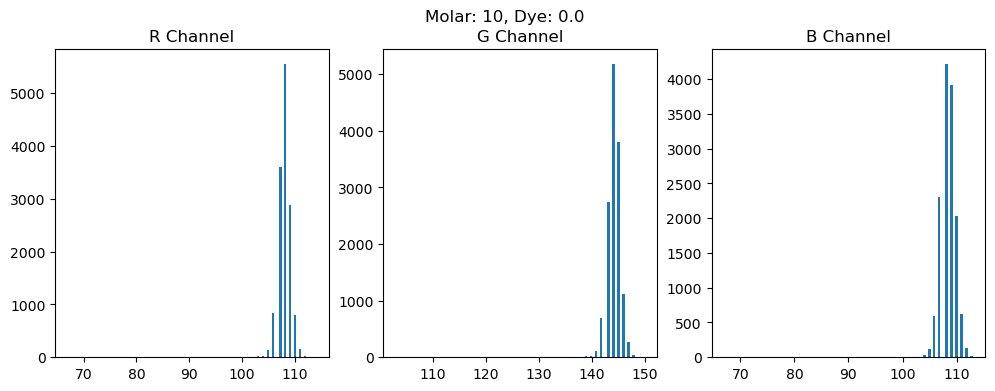

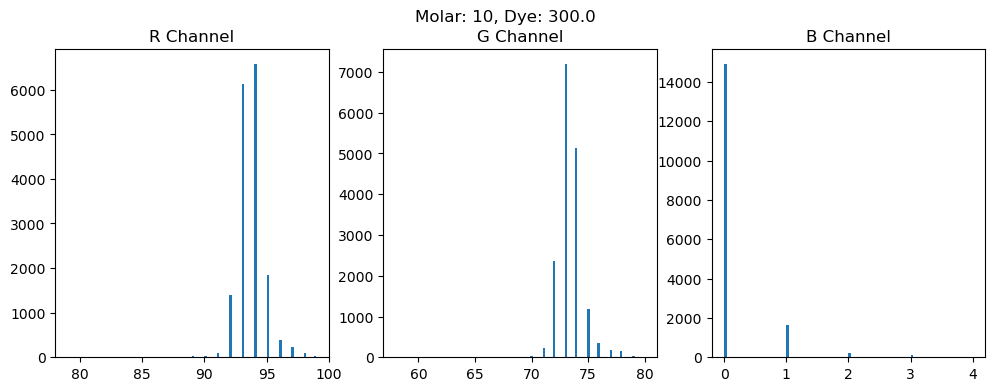

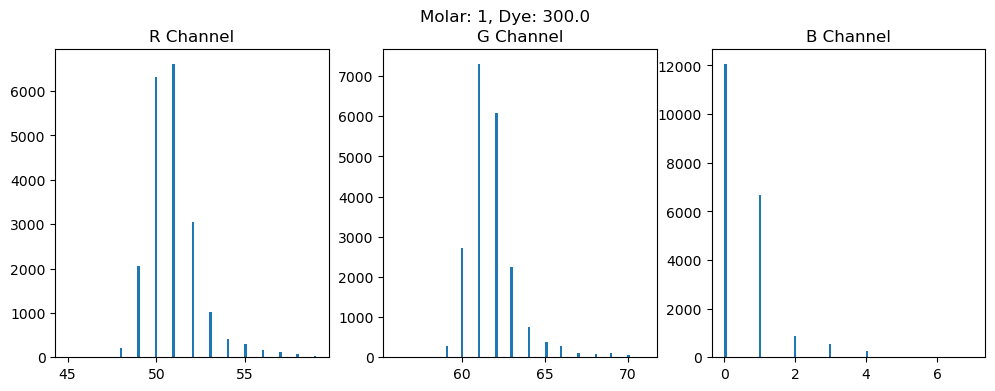

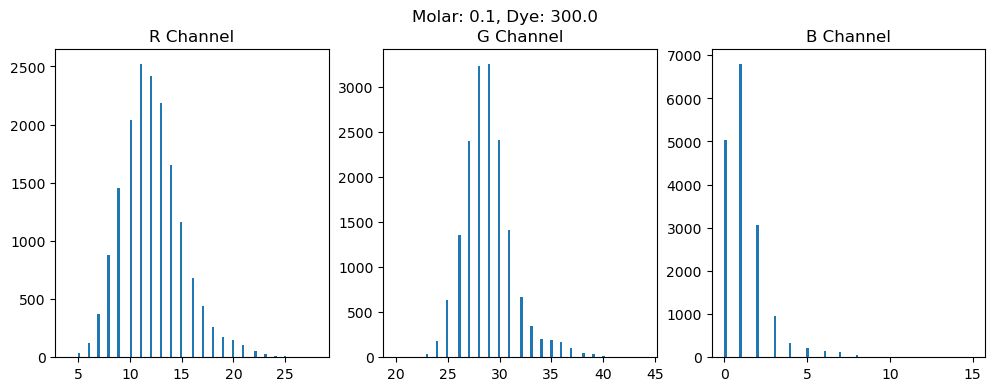

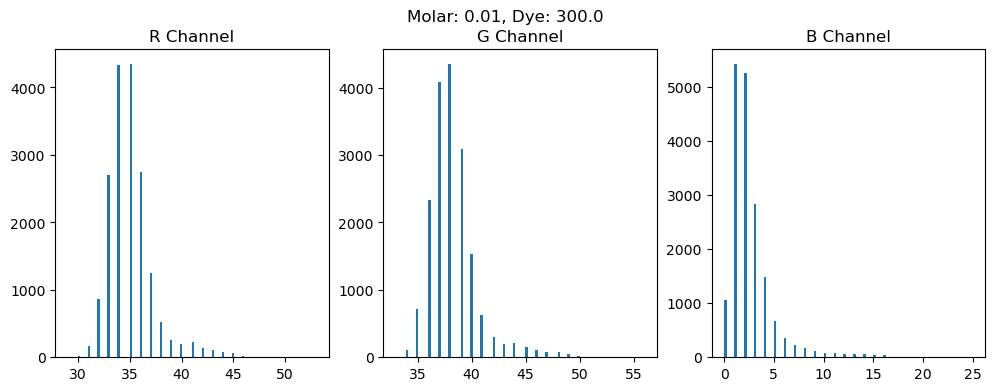

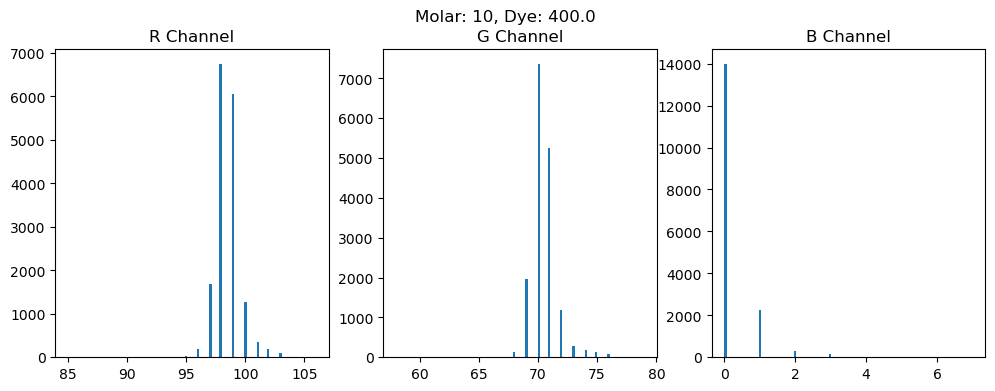

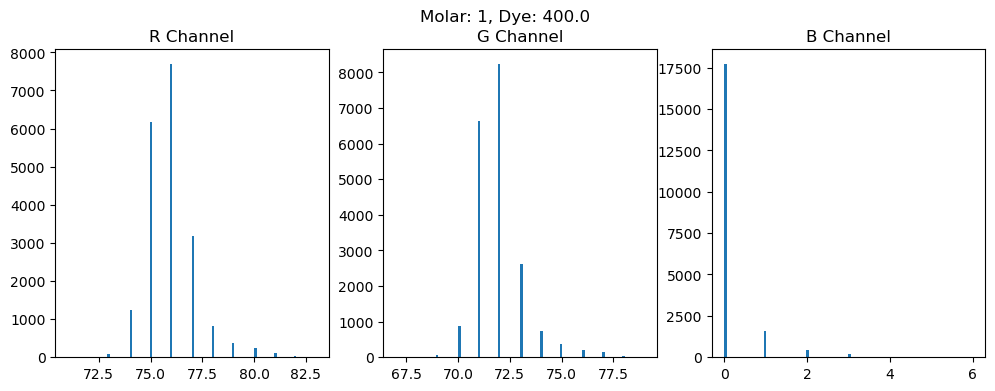

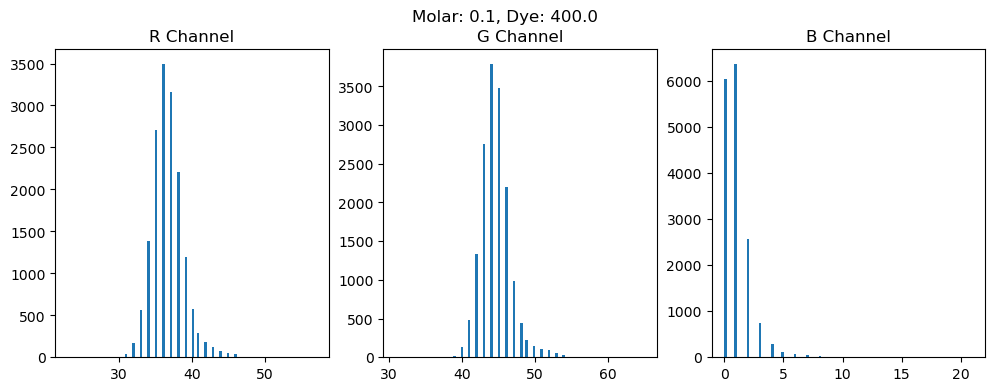

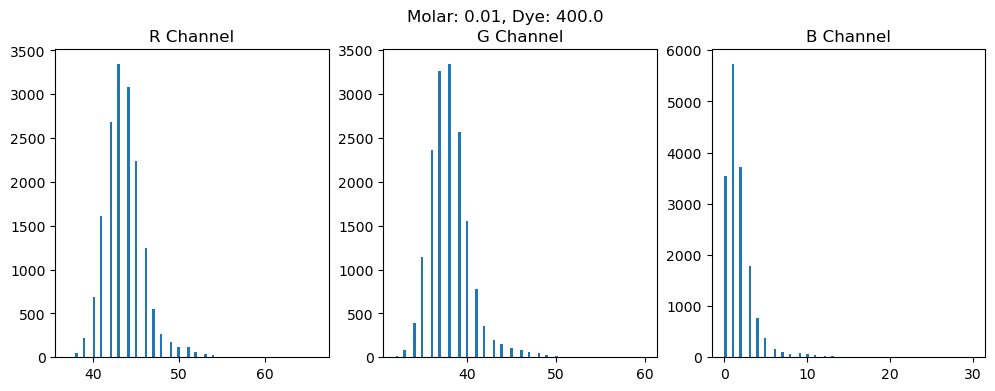

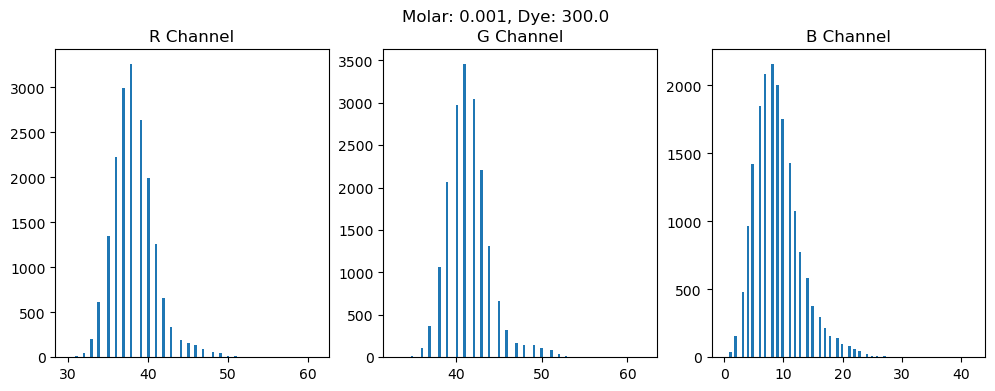

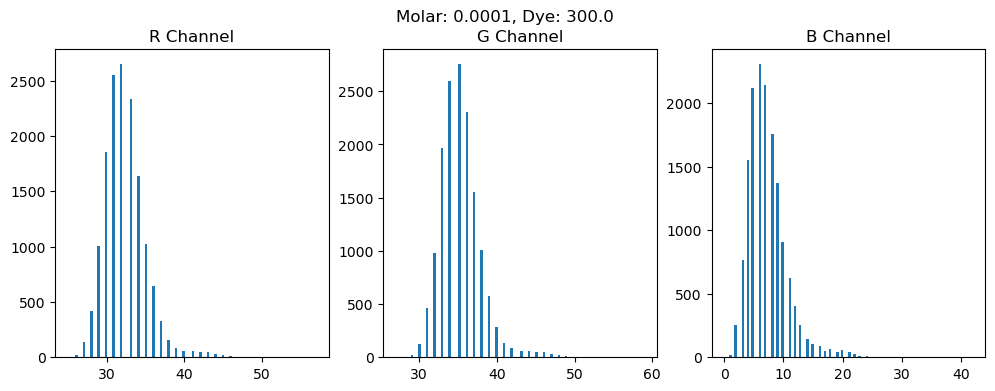

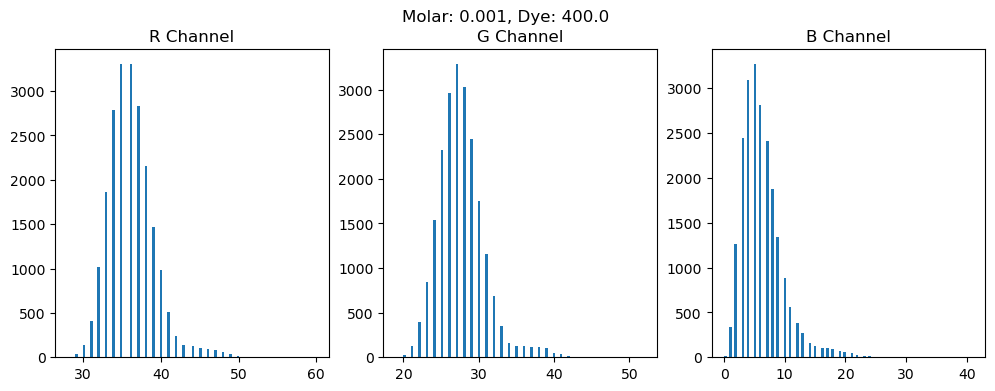

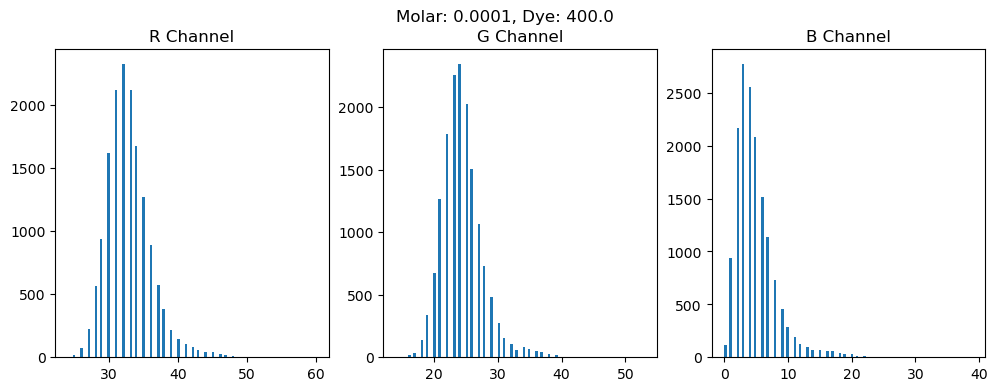

In [13]:
folders = list(initial_samples['Sample'])
special_folders = ['022', '023', '024']
processed = out_path
rstat = {}
gstat = {}
bstat = {}
rdist = {}
gdist = {}
bdist = {}
for i in range(len(res_df)):
    folder = res_df['Sample'].iloc[i]
    folder_path  = processed  + "/" + folder
    accumulator = None
    if folder in special_folders:
        for file in sorted(os.listdir(folder_path))[:10]:
            img = cv2.imread(folder_path + "/" + file).astype(np.float32)
            if accumulator is None:
                accumulator = img
            else:
                accumulator += img       
        average_img = accumulator / 10
    else:
        for file in os.listdir(folder_path):
            img = cv2.imread(folder_path + "/" + file).astype(np.float32)
            if accumulator is None:
                accumulator = img
            else:
                accumulator += img
        average_img = accumulator / len(os.listdir(folder_path))
    average_img = np.clip(average_img, 0, 255).astype(np.uint8)
    b = average_img[:,:, 0]
    g = average_img[:,:, 1]
    r = average_img[:,:, 2]
    rdist[folder] = r
    gdist[folder] = g
    bdist[folder] = b
    rstat[folder] = [np.mean(r), np.median(r), statistics.mode(r.flatten()), np.min(r), np.max(r), np.std(r)]
    gstat[folder] = [np.mean(g), np.median(g), statistics.mode(g.flatten()), np.min(g), np.max(g), np.std(g)]
    bstat[folder] = [np.mean(b), np.median(b), statistics.mode(b.flatten()), np.min(b), np.max(b), np.std(b)]
    title = f"Molar: {res_df['Molar'].iloc[i]}, Dye: {res_df['Dye'].iloc[i]}"
    plot_hist([r, g, b], title)

In [12]:
def plot_hist(channels,title = ''):
    plt.figure(figsize=(12,4)).suptitle(title)
    plt.subplot(1,3,1)
    plt.hist(channels[0].flatten(), bins=100)
    plt.title('R Channel')
    plt.subplot(1,3,2)
    plt.hist(channels[1].flatten(), bins=100)
    plt.title('G Channel')
    plt.subplot(1,3,3)
    plt.hist(channels[2].flatten(), bins=100)
    plt.title('B Channel')
    plt.show()

# Build Results

In [33]:
cols = ['Mean', 'Median', 'Mode', 'Min', 'Max', 'Std']
r_df = pd.DataFrame.from_dict(rstat, orient='index', columns=["R_" + col for col in cols])
g_df = pd.DataFrame.from_dict(gstat, orient='index', columns=["G_" + col for col in cols])
b_df = pd.DataFrame.from_dict(bstat, orient='index', columns=["B_" + col for col in cols])

,Molar,Dye
Sample,,
007,10,0.0
008,10,300.0
010,1,300.0
012,0.1,300.0
015,0.01,300.0
018,10,400.0
020,1,400.0
022,0.1,400.0
023,0.01,400.0


In [103]:
final_df = pd.concat([res_df.set_index('Sample'), r_df, g_df, b_df], axis=1)
final_df = final_df.reset_index().rename(columns={'index': 'Sample'})
final_df.to_csv("09_06_2025_Results.csv")

In [104]:
final_df

,Sample,Molar,Dye,R_Mean,R_Median,R_Mode,R_Min,R_Max,R_Std,G_Mean,...,G_Mode,G_Min,G_Max,G_Std,B_Mean,B_Median,B_Mode,B_Min,B_Max,B_Std
0,007,10,0.0,107.893741,108.0,108,67,114,1.370209,144.130228,...,144,103,150,1.400888,108.414154,108.0,108,67,113,1.546238
1,008,10,300.0,93.647633,94.0,94,79,99,1.137803,73.415621,...,73,58,80,1.187127,0.148166,0.0,0,0,4,0.454757
2,010,1,300.0,50.940857,51.0,51,45,59,1.517141,61.739388,...,61,56,71,1.523183,0.552411,0.0,0,0,7,0.831455
3,012,0.1,300.0,12.156105,12.0,11,4,28,2.930569,28.889068,...,29,20,44,2.432509,1.236186,1.0,1,0,15,1.360035
4,015,0.01,300.0,35.029210,35.0,35,29,53,2.188840,38.241548,...,38,33,56,2.250957,2.516683,2.0,1,0,25,2.286481
5,018,10,400.0,98.514988,98.0,98,85,106,1.099594,70.474920,...,70,58,79,1.172185,0.196071,0.0,0,0,7,0.504680
6,020,1,400.0,75.934332,76.0,76,71,83,1.211564,71.921308,...,72,67,79,1.187142,0.160639,0.0,0,0,6,0.514556
7,022,0.1,400.0,36.643524,36.0,36,23,57,2.195689,44.584899,...,44,31,65,2.071424,1.017618,1.0,1,0,21,1.162329
8,023,0.01,400.0,43.599758,43.0,43,37,66,2.299951,38.046158,...,38,32,60,2.325869,1.733273,1.0,1,0,30,1.846515
9,024,0.001,300.0,38.278628,38.0,38,30,61,2.652691,41.486451,...,41,33,62,2.527197,9.030758,9.0,8,0,42,3.872699


# Exploratory Data Analysis

## RGB Plot for 300 Molar

In [26]:
Samples = list(res_df[res_df['Dye'] == 300]['Sample'])
Molars = list(res_df[res_df['Dye'] == 300]['Molar'])   

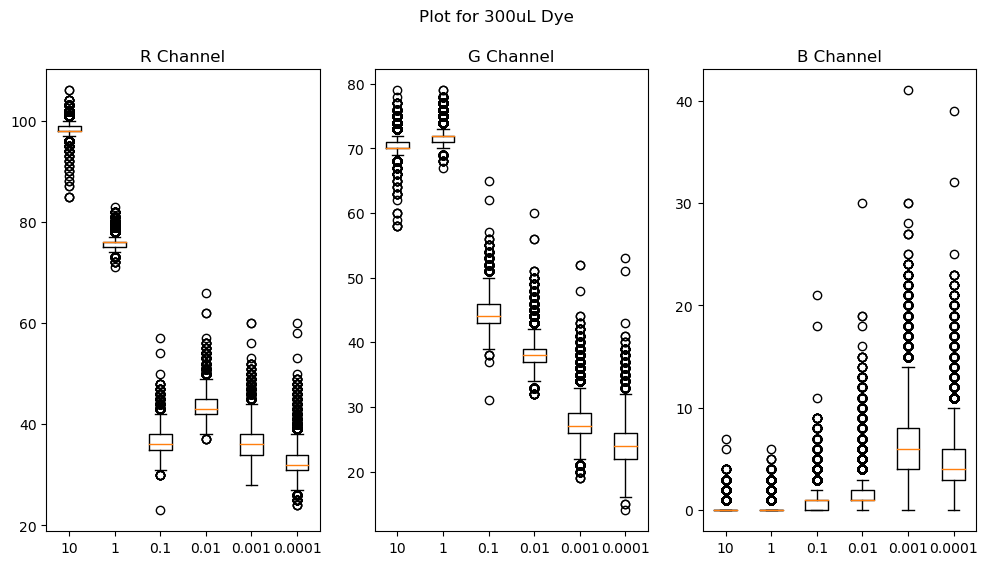

In [30]:
plt.figure(figsize=(12,6)).suptitle("Plot for 300uL Dye")
plt.subplot(1,3,1)
filtered_dict = {k: v.flatten() for k, v in rdist.items() if k in Samples}
plt.boxplot(filtered_dict.values(), labels=Molars)
plt.title('R Channel')
plt.subplot(1,3,2)
filtered_dict = {k: v.flatten() for k, v in gdist.items() if k in Samples}
plt.boxplot(filtered_dict.values(), labels=Molars)
plt.title('G Channel')

plt.subplot(1,3,3)
filtered_dict = {k: v.flatten() for k, v in bdist.items() if k in Samples}
plt.boxplot(filtered_dict.values(), labels=Molars)
plt.title('B Channel')
plt.show()

## RGB Plot for 400 Molar

In [27]:
Samples = list(res_df[res_df['Dye'] == 400]['Sample'])
Molars = list(res_df[res_df['Dye'] == 400]['Molar'])   

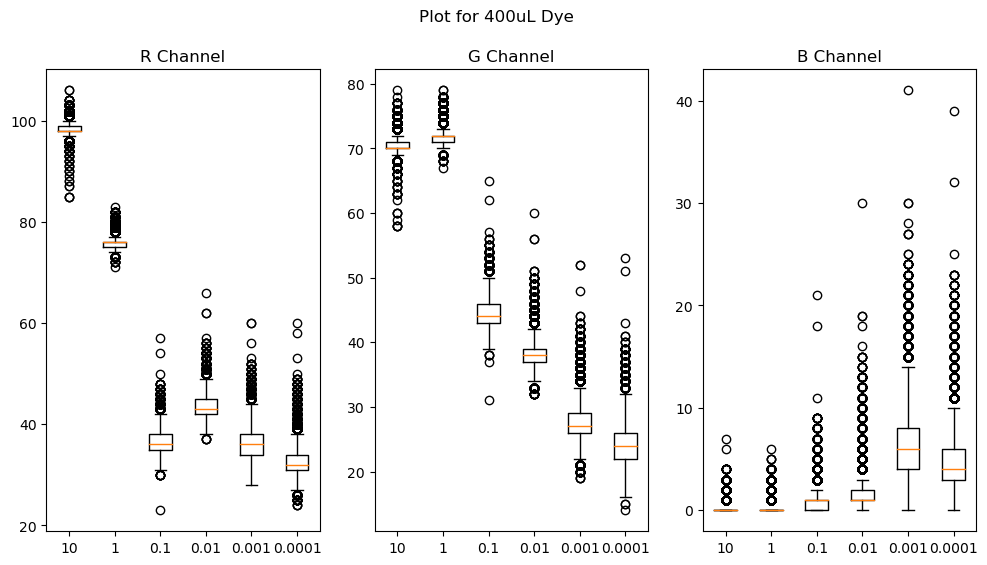

In [29]:
plt.figure(figsize=(12,6)).suptitle("Plot for 400uL Dye")
plt.subplot(1,3,1)
filtered_dict = {k: v.flatten() for k, v in rdist.items() if k in Samples}
plt.boxplot(filtered_dict.values(), labels=Molars)
plt.title('R Channel')
plt.subplot(1,3,2)
filtered_dict = {k: v.flatten() for k, v in gdist.items() if k in Samples}
plt.boxplot(filtered_dict.values(), labels=Molars)
plt.title('G Channel')
plt.subplot(1,3,3)
filtered_dict = {k: v.flatten() for k, v in bdist.items() if k in Samples}
plt.boxplot(filtered_dict.values(), labels=Molars)
plt.title('B Channel')
plt.show()

## Statistical Analysis of RGB Plot 300 Molar

In [94]:
def plot_channels(df, dye, typ, fig_title = "", fig = None, c='b'):    
    def_cols = ['Molar']
    part_cols = [col for col in list(df.columns) if typ.lower() in col.lower()]
    part_df = df[df['Dye'] == dye][def_cols + part_cols]
#     if fig is None:
    fig = plt.figure(figsize=(12,4)).suptitle(fig_title)
    plt.subplot(1,3,1)
    plt.plot(np.log10(part_df['Molar'].astype(np.float32)), part_df.iloc[:, -3], 'o', color = c)
    plt.title("R Channel")
    plt.subplot(1,3,2)
    plt.plot(np.log10(part_df['Molar'].astype(np.float32)), part_df.iloc[:, -2], 'o', color = c)
    plt.title("G Channel")
    plt.subplot(1,3,3)
    plt.plot(np.log10(part_df['Molar'].astype(np.float32)), part_df.iloc[:, -1], 'o', color = c)
    plt.title("B Channel")
#     return fig

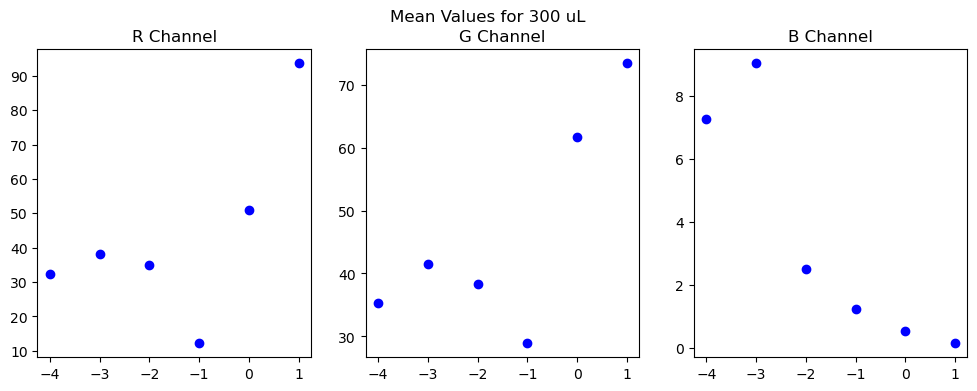

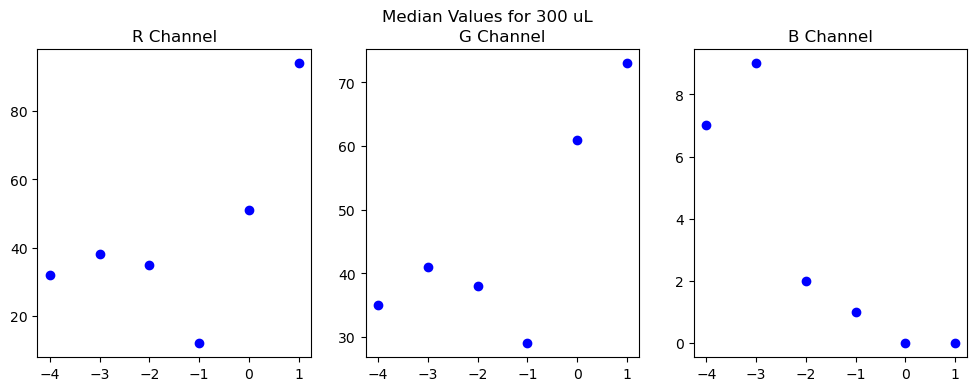

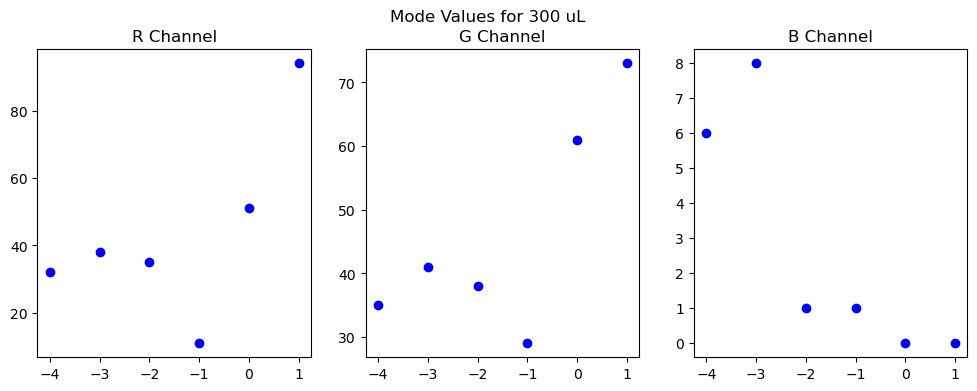

In [96]:
plot_channels(final_df, 300, 'mean', fig_title = "Mean Values for 300 uL")
plot_channels(final_df, 300, 'median', fig_title = "Median Values for 300 uL")
plot_channels(final_df, 300, 'mode', fig_title = "Mode Values for 300 uL")

## Statistical Analysis of RGB Plot 400 Molar

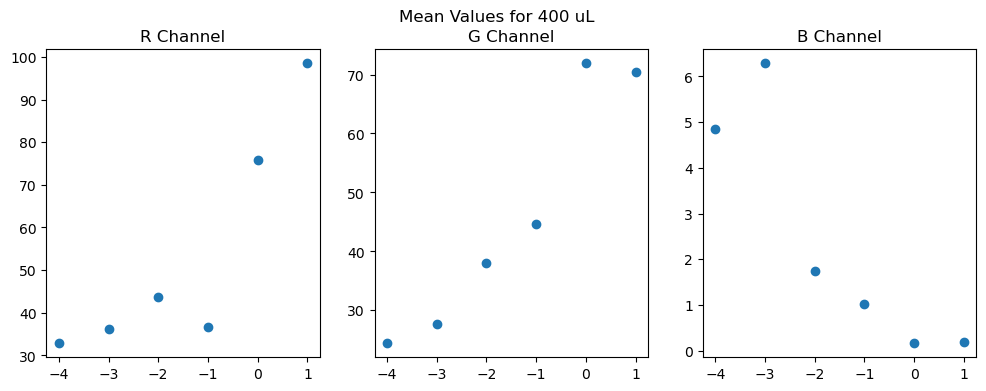

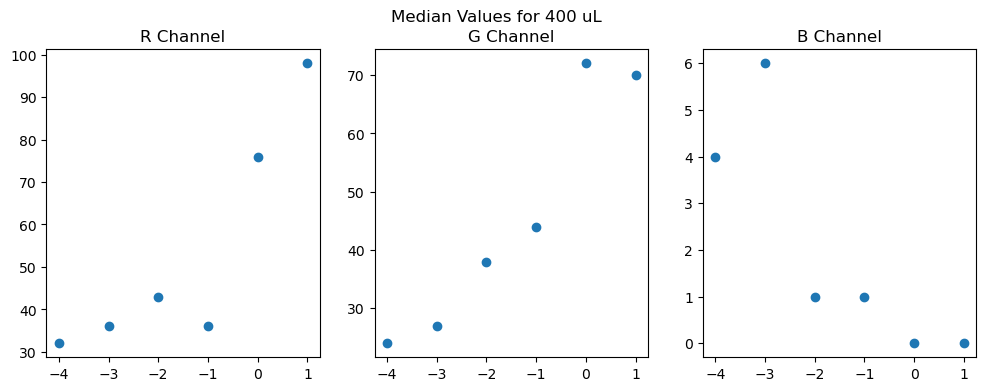

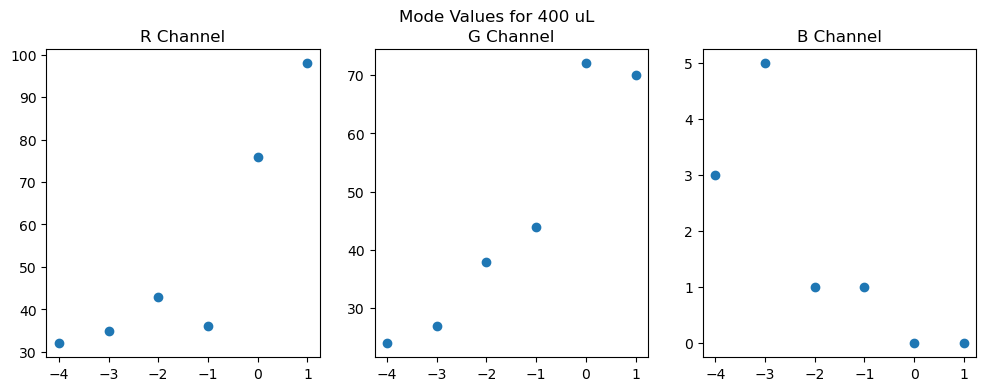

In [166]:
plot_channels(final_df, 400, 'mean', fig_title = "Mean Values for 400 uL")
plot_channels(final_df, 400, 'median', fig_title = "Median Values for 400 uL")
plot_channels(final_df, 400, 'mode', fig_title = "Mode Values for 400 uL")

In [ ]:
, color = c

In [150]:
## Statistical Analysis of RGB Plot 400 Molar
plot_channels(final_df, 400, 'mean', fig_title = "Mean Values for 400 uL")
plot_channels(final_df, 400, 'median', fig_title = "Median Values for 400 uL")
plot_channels(final_df, 400, 'mode', fig_title = "Mode Values for 400 uL")

008    10.0000
010     1.0000
012     0.1000
015     0.0100
024     0.0010
025     0.0001
Name: Molar, dtype: float32

In [151]:
np.log10(part_df['Molar'].astype(np.float32))

008    1.0
010    0.0
012   -1.0
015   -2.0
024   -3.0
025   -4.0
Name: Molar, dtype: float32

In [47]:
final_df

,Sample,Molar,Dye,R_Mean,R_Median,R_Mode,R_Min,R_Max,R_Std,G_Mean,...,G_Mode,G_Min,G_Max,G_Std,B_Mean,B_Median,B_Mode,B_Min,B_Max,B_Std
0,007,10,0.0,107.893741,108.0,108,67,114,1.370209,144.130228,...,144,103,150,1.400888,108.414154,108.0,108,67,113,1.546238
1,008,10,300.0,93.647633,94.0,94,79,99,1.137803,73.415621,...,73,58,80,1.187127,0.148166,0.0,0,0,4,0.454757
2,010,1,300.0,50.940857,51.0,51,45,59,1.517141,61.739388,...,61,56,71,1.523183,0.552411,0.0,0,0,7,0.831455
3,012,0.1,300.0,12.156105,12.0,11,4,28,2.930569,28.889068,...,29,20,44,2.432509,1.236186,1.0,1,0,15,1.360035
4,015,0.01,300.0,35.029210,35.0,35,29,53,2.188840,38.241548,...,38,33,56,2.250957,2.516683,2.0,1,0,25,2.286481
5,018,10,400.0,98.514988,98.0,98,85,106,1.099594,70.474920,...,70,58,79,1.172185,0.196071,0.0,0,0,7,0.504680
6,020,1,400.0,75.934332,76.0,76,71,83,1.211564,71.921308,...,72,67,79,1.187142,0.160639,0.0,0,0,6,0.514556
7,022,0.1,400.0,36.643524,36.0,36,23,57,2.195689,44.584899,...,44,31,65,2.071424,1.017618,1.0,1,0,21,1.162329
8,023,0.01,400.0,43.599758,43.0,43,37,66,2.299951,38.046158,...,38,32,60,2.325869,1.733273,1.0,1,0,30,1.846515
9,024,0.001,300.0,38.278628,38.0,38,30,61,2.652691,41.486451,...,41,33,62,2.527197,9.030758,9.0,8,0,42,3.872699


In [66]:
def calc_eucledian(df):
    mean_cols = [col for col in list(df.columns) if 'mean' in col.lower()]
    mean_values = df[mean_cols]
    mean_mat = df[mean_cols].to_numpy()
    mean_dist = []
    min_dist = []
    for i in range(mean_mat.shape[0]):
        dist = np.sqrt(np.sum((mean_mat - mean_mat[i]) ** 2, axis=1))
        mean_dist.append(np.mean(dist))
        min_dist.append(sorted(dist)[1])
    return mean_dist, min_dist

In [72]:
df_300 = final_df[final_df['Dye'] == 300]
df_400 = final_df[final_df['Dye'] == 400]

mean_dist, min_dist = calc_eucledian(df_300)
df_300.loc[:, 'Mean_Distance'] = mean_dist
df_300.loc[:, 'Nearest_Distance'] = min_dist

mean_dist, min_dist = calc_eucledian(df_400)
df_400.loc[:, 'Mean_Distance'] = mean_dist
df_400.loc[:, 'Nearest_Distance'] = min_dist

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7476\652920003.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_300.loc[:, 'Mean_Distance'] = mean_dist
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7476\652920003.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_300.loc[:, 'Nearest_Distance'] = min_dist
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7476\652920003.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

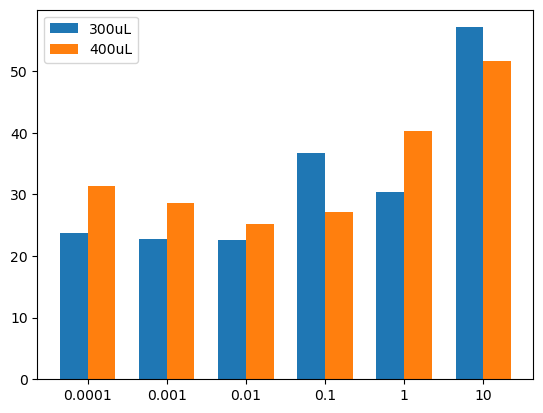

In [86]:
labels = df_300.sort_values(by = 'Molar')['Molar']
values1 = df_300.sort_values(by = 'Molar')['Mean_Distance']  # e.g., Mean R values
values2 = df_400.sort_values(by = 'Molar')['Mean_Distance']  # e.g., Mean G values

x = np.arange(len(labels))  # label locations
width = 0.35  # width of the bars

# Plotting
fig, ax = plt.subplots()
bars1 = ax.bar(x - width/2, values1, width, label='300uL')
bars2 = ax.bar(x + width/2, values2, width, label='400uL')
ax.set_xticks(x)
ax.set_xticklabels(list(labels))
ax.legend()

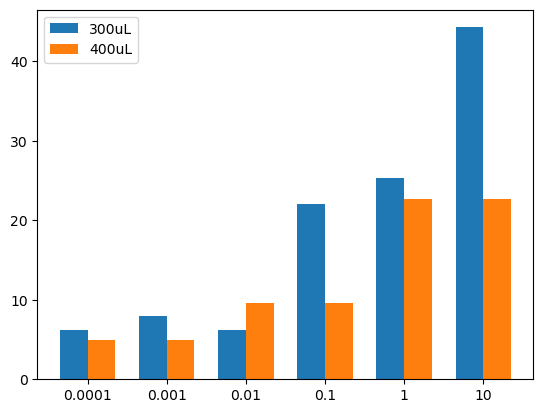

In [89]:
labels = df_300.sort_values(by = 'Molar')['Molar']
values1 = df_300.sort_values(by = 'Molar')['Nearest_Distance']  # e.g., Mean R values
values2 = df_400.sort_values(by = 'Molar')['Nearest_Distance']  # e.g., Mean G values

x = np.arange(len(labels))  # label locations
width = 0.35  # width of the bars

# Plotting
fig, ax = plt.subplots()
bars1 = ax.bar(x - width/2, values1, width, label='300uL')
bars2 = ax.bar(x + width/2, values2, width, label='400uL')
ax.set_xticks(x)
ax.set_xticklabels(list(labels))
ax.legend()

In [90]:
df_300[['Molar', 'Mean_Distance', 'Nearest_Distance']]

,Molar,Mean_Distance,Nearest_Distance
1,10,57.100415,44.276027
2,1,30.318098,25.345530
3,0.1,36.752230,22.037513
4,0.01,22.626043,6.192760
9,0.001,22.770122,7.970024
10,0.0001,23.751471,6.192760


In [91]:
df_400[['Molar', 'Mean_Distance', 'Nearest_Distance']]

,Molar,Mean_Distance,Nearest_Distance
5,10,51.626438,22.626960
6,1,40.256093,22.626960
7,0.1,27.203963,9.573739
8,0.01,25.247754,9.573739
11,0.001,28.660884,4.879187
12,0.0001,31.366905,4.879187


Text(0.5, 1.0, 'Distance from nearest point')

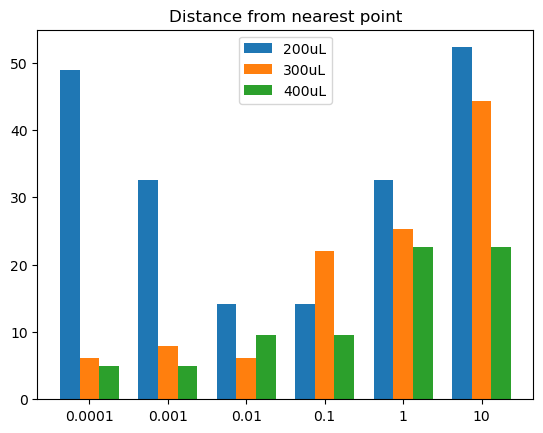

In [102]:
labels = df_300.sort_values(by = 'Molar')['Molar']
values1 = df_300.sort_values(by = 'Molar')['Nearest_Distance']  # e.g., Mean R values
values2 = df_400.sort_values(by = 'Molar')['Nearest_Distance']  # e.g., Mean G values
values3 = [48.85505676269531, 32.52175521850586, 14.200471878051758, 14.200471878051758, 32.52175521850586, 52.28005599975586]
x = np.arange(len(labels))  # label locations
width = 0.25  # width of the bars

# Plotting
fig, ax = plt.subplots()
bars3 = ax.bar(x - 0.25, values3, width, label='200uL')
bars1 = ax.bar(x, values1, width, label='300uL')
bars2 = ax.bar(x + 0.25, values2, width, label='400uL')
ax.set_xticks(x)
ax.set_xticklabels(list(labels))
ax.legend()
plt.title('Distance from nearest point')